In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
import keras.layers as layers

In [3]:
%matplotlib inline

In [4]:
from keras.preprocessing.image import load_img

In [5]:
base_path = './data'

## Explore dataset

In [6]:
curly_path = 'train/curly/0fd85bcde626a95e20489c83f292d8204.jpg'
dreadlocks_path = 'test/dreadlocks/image.jpg'
kinky_path = 'test/kinky/images17.jpg'
straight_path = 'val/Straight/BnIQijhCcAEofEG.png'
wavy_path = 'val/Wavy/images75.jpg'

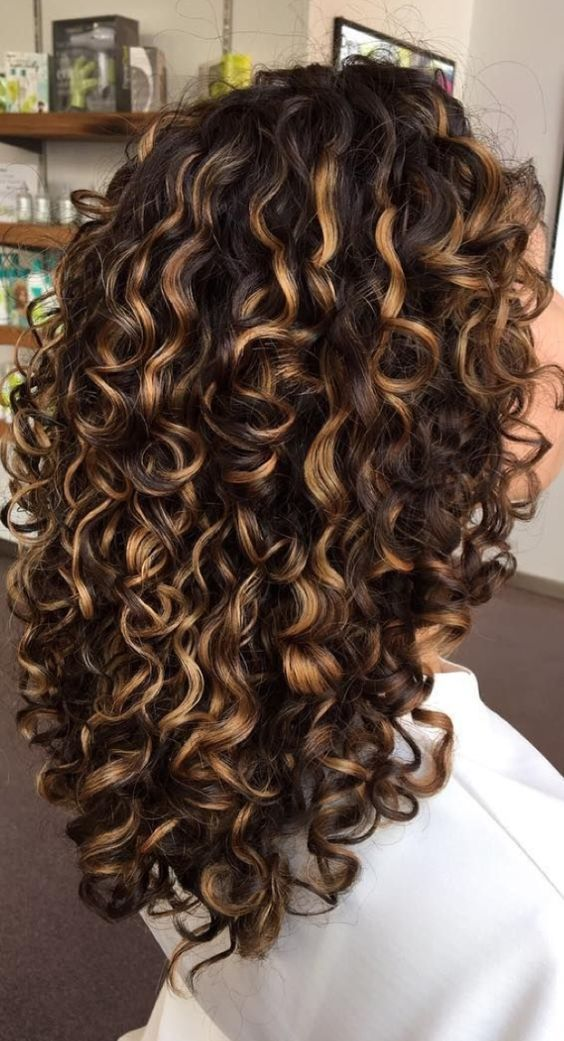

In [7]:
load_img(f'{base_path}/{curly_path}')

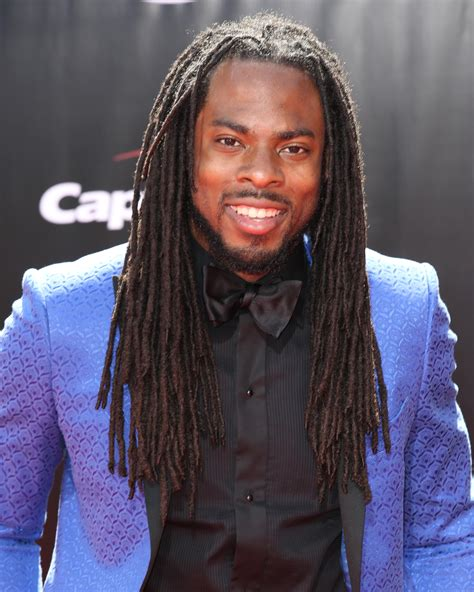

In [8]:
load_img(f'{base_path}/{dreadlocks_path}')

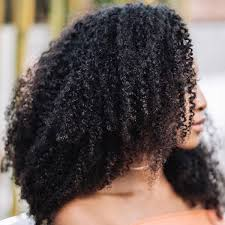

In [9]:
load_img(f'{base_path}/{kinky_path}')

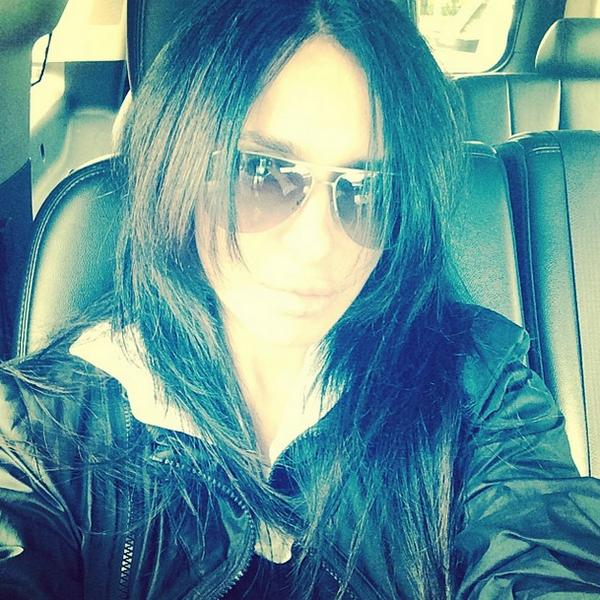

In [10]:
load_img(f'{base_path}/{straight_path}')

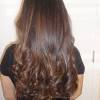

In [11]:
load_img(f'{base_path}/{wavy_path}')

## Prepare data

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_generator = ImageDataGenerator()

In [14]:
train_ds = train_generator.flow_from_directory(
    f'{base_path}/train',
    target_size=(200, 200),
    batch_size=20
)

Found 1687 images belonging to 5 classes.


In [15]:
train_ds.class_indices

{'Straight': 0, 'Wavy': 1, 'curly': 2, 'dreadlocks': 3, 'kinky': 4}

In [16]:
val_generator = ImageDataGenerator()

In [17]:
val_ds = val_generator.flow_from_directory(
    f'{base_path}/val',
    target_size=(200, 200),
    batch_size=20
)

Found 99 images belonging to 5 classes.


In [18]:
val_ds.class_indices

{'Straight': 0, 'Wavy': 1, 'curly': 2, 'dreadlocks': 3, 'kinky': 4}

In [19]:
test_generator = ImageDataGenerator()

In [20]:
test_ds = test_generator.flow_from_directory(
    f'{base_path}/test',
    target_size=(200, 200),
    batch_size=20,
    shuffle=False
)

Found 201 images belonging to 5 classes.


In [21]:
test_ds.class_indices

{'Straight': 0, 'Wavy': 1, 'curly': 2, 'dreadlocks': 3, 'kinky': 4}

## Prepare augmented data

In [22]:
train_generator_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [23]:
train_ds_aug = train_generator_aug.flow_from_directory(
    f'{base_path}/train',
    target_size=(200, 200),
    batch_size=20
)

Found 1687 images belonging to 5 classes.


In [24]:
train_ds_aug.class_indices

{'Straight': 0, 'Wavy': 1, 'curly': 2, 'dreadlocks': 3, 'kinky': 4}

In [25]:
val_generator_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [26]:
val_ds_aug = val_generator_aug.flow_from_directory(
    f'{base_path}/val',
    target_size=(200, 200),
    batch_size=20
)

Found 99 images belonging to 5 classes.


In [27]:
val_ds_aug.class_indices

{'Straight': 0, 'Wavy': 1, 'curly': 2, 'dreadlocks': 3, 'kinky': 4}

In [28]:
test_generator_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [29]:
test_ds_aug = test_generator_aug.flow_from_directory(
    f'{base_path}/test',
    target_size=(200, 200),
    batch_size=20,
    shuffle=False
)

Found 201 images belonging to 5 classes.


In [30]:
test_ds_aug.class_indices

{'Straight': 0, 'Wavy': 1, 'curly': 2, 'dreadlocks': 3, 'kinky': 4}

## Model without pretrained weights and dropout

In [31]:
model_1 = Sequential([
    keras.Input(shape=(200, 200, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(5, activation="softmax")
])

In [32]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,240,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,334,021 (39.42 MB)

 Trainable params: 10,334,021 (39.42 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.8)
loss = keras.losses.CategoricalCrossentropy()

In [34]:
model_1.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
history_1 = model_1.fit(train_ds, epochs=10, validation_data=val_ds)

C:\Users\Kate\.virtualenvs\hair-classifier-1zbskkyn\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 43s 499ms/step - accuracy: 0.2351 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 42s 488ms/step - accuracy: 0.2257 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 41s 485ms/step - accuracy: 0.2304 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 42s 495ms/step - accuracy: 0.2379 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 43s 506ms/step - accuracy: 0.2411 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 42s 494ms/step - accuracy: 0.2391 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 42s 489ms/step - accuracy: 0.2301 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 42s 490ms/step - accuracy: 0.2460 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 9/10
85/85

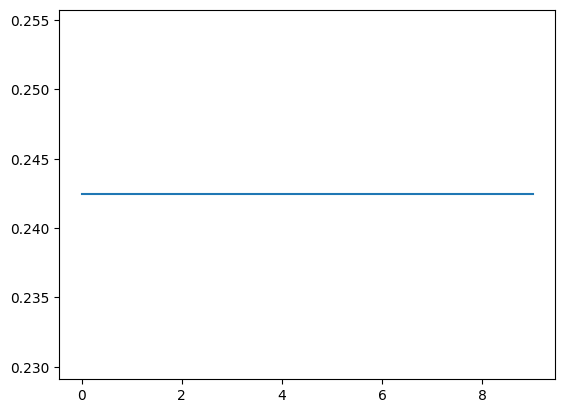

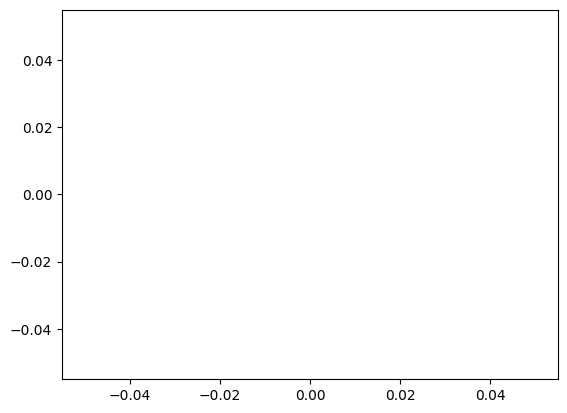

In [35]:
plt.plot(history_1.history["val_accuracy"], label='accuracy')
plt.show()
plt.plot(history_1.history["val_loss"], label='accuracy')

In [36]:
test_loss_1, test_accuracy_1 = model_1.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - accuracy: 0.4990 - loss: nan


In [37]:
history_aug_1 = model_1.fit(train_ds_aug, epochs=10, validation_data=val_ds_aug)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 68s 794ms/step - accuracy: 0.2573 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 81s 789ms/step - accuracy: 0.2434 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 67s 793ms/step - accuracy: 0.2223 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 81s 786ms/step - accuracy: 0.2409 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 65s 762ms/step - accuracy: 0.2438 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 63s 747ms/step - accuracy: 0.2407 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 63s 743ms/step - accuracy: 0.2460 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 67s 783ms/step - accuracy: 0.2389 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 9/10
85/85

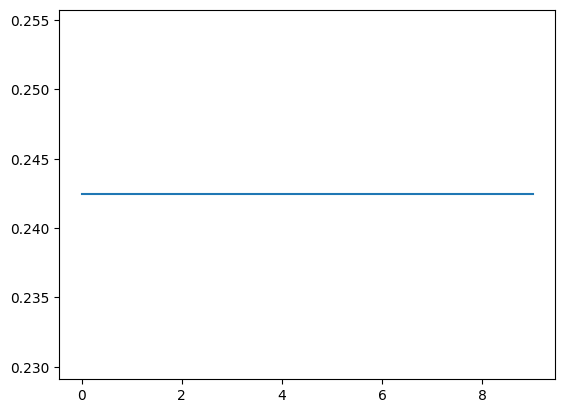

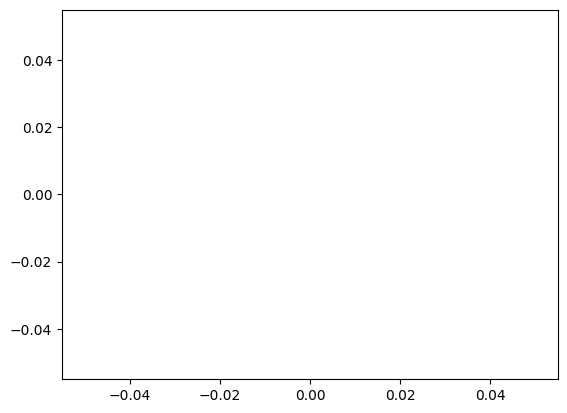

In [38]:
plt.plot(history_aug_1.history["val_accuracy"], label='accuracy')
plt.show()
plt.plot(history_aug_1.history["val_loss"], label='accuracy')

In [39]:
test_loss_aug_1, test_accuracy_aug_1 = model_1.evaluate(test_ds_aug)

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 437ms/step - accuracy: 0.4990 - loss: nan


## Add dropout layer

In [40]:
model_2 = Sequential([
    keras.Input(shape=(200, 200, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(5, activation="softmax")
])

In [41]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 100, 100, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      10,240,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,334,021 (39.42 MB)

 Trainable params: 10,334,021 (39.42 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.8)
loss = keras.losses.CategoricalCrossentropy()

In [43]:
model_2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
history_2 = model_2.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 44s 493ms/step - accuracy: 0.2597 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 41s 482ms/step - accuracy: 0.2391 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 41s 483ms/step - accuracy: 0.2572 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 43s 502ms/step - accuracy: 0.2482 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 43s 509ms/step - accuracy: 0.2534 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 44s 508ms/step - accuracy: 0.2233 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 43s 499ms/step - accuracy: 0.2576 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 42s 494ms/step - accuracy: 0.2557 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 9/10
85/85

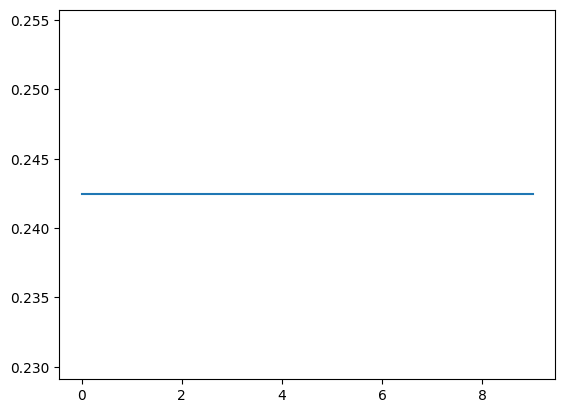

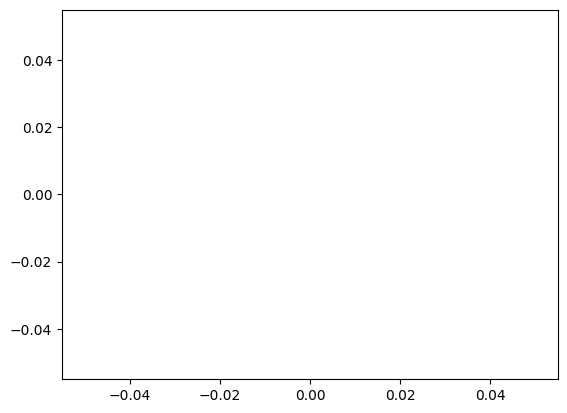

In [44]:
plt.plot(history_2.history["val_accuracy"], label='accuracy')
plt.show()
plt.plot(history_2.history["val_loss"], label='accuracy')

In [45]:
test_loss_2, test_accuracy_2 = model_2.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 240ms/step - accuracy: 0.4990 - loss: nan


In [46]:
history_aug_2 = model_2.fit(train_ds_aug, epochs=10, validation_data=val_ds_aug)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 68s 798ms/step - accuracy: 0.2508 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 67s 788ms/step - accuracy: 0.2584 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 82s 784ms/step - accuracy: 0.2416 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 66s 773ms/step - accuracy: 0.2507 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 65s 761ms/step - accuracy: 0.2433 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 66s 772ms/step - accuracy: 0.2537 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 68s 795ms/step - accuracy: 0.2292 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 66s 772ms/step - accuracy: 0.2348 - loss: nan - val_accuracy: 0.2424 - val_loss: nan
Epoch 9/10
85/85

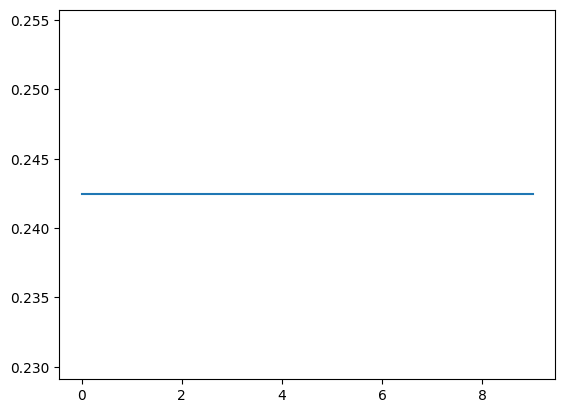

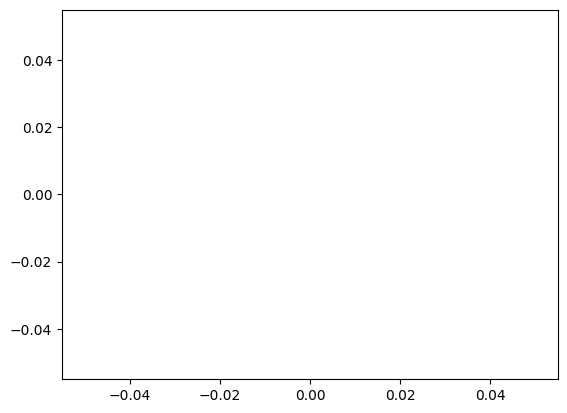

In [47]:
plt.plot(history_aug_2.history["val_accuracy"], label='accuracy')
plt.show()
plt.plot(history_aug_2.history["val_loss"], label='accuracy')

In [48]:
test_loss_aug_2, test_accuracy_aug_2 = model_2.evaluate(test_ds_aug)

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 512ms/step - accuracy: 0.4990 - loss: nan


## Add batch normalization layer

In [50]:
model_3 = Sequential([
    keras.Input(shape=(200, 200, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(5, activation="softmax")
])

In [51]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 200, 200, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 100, 100, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      10,240,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,334,149 (39.42 MB)

 Trainable params: 10,334,085 (39.42 MB)

 Non-trainable params: 64 (256.00 B)

In [52]:
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.8)
loss = keras.losses.CategoricalCrossentropy()

In [53]:
model_3.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
history_3 = model_3.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 59s 666ms/step - accuracy: 0.2333 - loss: 3.2105 - val_accuracy: 0.2727 - val_loss: 1.5721
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 56s 653ms/step - accuracy: 0.2592 - loss: 1.5644 - val_accuracy: 0.2626 - val_loss: 1.5682
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 56s 655ms/step - accuracy: 0.2509 - loss: 1.5783 - val_accuracy: 0.2626 - val_loss: 1.5662
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 56s 653ms/step - accuracy: 0.2681 - loss: 1.5617 - val_accuracy: 0.2525 - val_loss: 1.5689
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 56s 656ms/step - accuracy: 0.2477 - loss: 1.7041 - val_accuracy: 0.2525 - val_loss: 1.5652
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 56s 654ms/step - accuracy: 0.2912 - loss: 1.5643 - val_accuracy: 0.2424 - val_loss: 1.5613
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 56s 653ms/step - accuracy: 0.2794 - loss: 1.5579 - val_accuracy: 0.2929 - val_loss: 1.5569
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 55s 645ms/step - accuracy: 0.3438 - loss: 1.5108 - val_accu

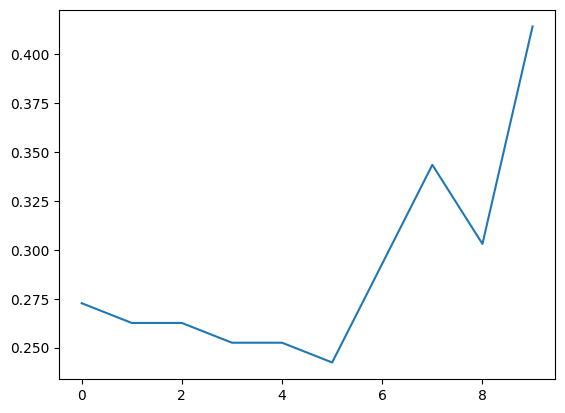

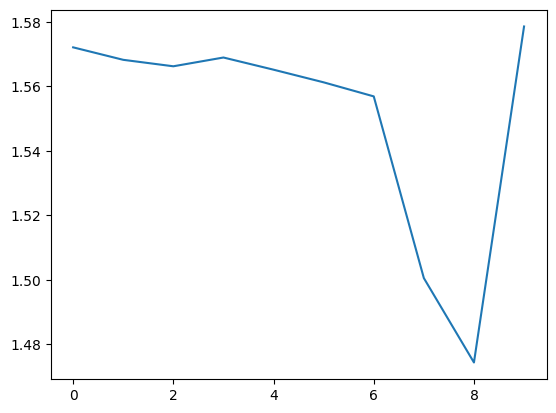

In [54]:
plt.plot(history_3.history["val_accuracy"], label='accuracy')
plt.show()
plt.plot(history_3.history["val_loss"], label='accuracy')

In [55]:
test_loss_3, test_accuracy_3 = model_3.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - accuracy: 0.4458 - loss: 1.3646


In [56]:
history_aug_3 = model_3.fit(train_ds_aug, epochs=10, validation_data=val_ds_aug)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 969ms/step - accuracy: 0.2773 - loss: 1.5589 - val_accuracy: 0.2626 - val_loss: 1.5682
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 80s 941ms/step - accuracy: 0.3007 - loss: 1.5560 - val_accuracy: 0.2424 - val_loss: 1.5707
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 79s 927ms/step - accuracy: 0.3268 - loss: 1.5170 - val_accuracy: 0.2424 - val_loss: 1.5718
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 79s 935ms/step - accuracy: 0.3204 - loss: 1.5123 - val_accuracy: 0.2424 - val_loss: 1.5804
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 77s 903ms/step - accuracy: 0.3202 - loss: 1.4959 - val_accuracy: 0.1919 - val_loss: 1.5787
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 80s 940ms/step - accuracy: 0.3529 - loss: 1.4715 - val_accuracy: 0.4040 - val_loss: 1.4465
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 80s 945ms/step - accuracy: 0.3820 - loss: 1.4448 - val_accuracy: 0.3939 - val_loss: 1.4869
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 79s 932ms/step - accuracy: 0.3952 - loss: 1.4275 - val_accu

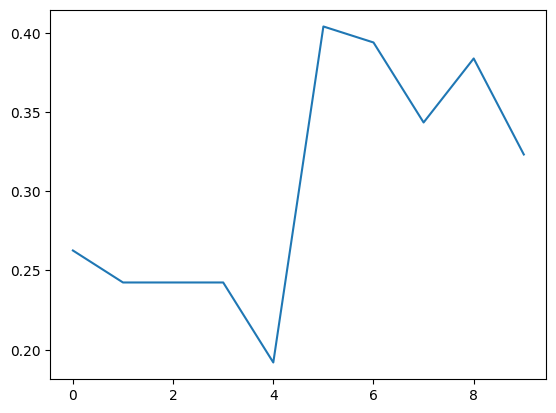

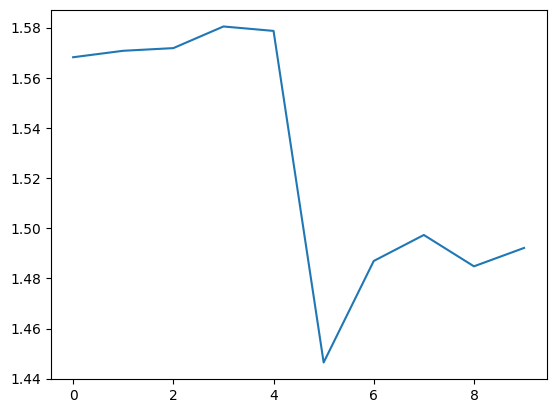

In [57]:
plt.plot(history_aug_3.history["val_accuracy"], label='accuracy')
plt.show()
plt.plot(history_aug_3.history["val_loss"], label='accuracy')

In [58]:
test_loss_aug_3, test_accuracy_aug_3 = model_3.evaluate(test_ds_aug)

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 463ms/step - accuracy: 0.4094 - loss: 1.3975


## Model with pre-trained weights

In [59]:
from tensorflow.keras.applications.xception import Xception

In [60]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(200, 200, 3)
)

In [61]:
base_model.trainable = False

In [62]:
inputs = keras.Input(shape=(200, 200, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(5, activation="softmax")(vectors)

In [63]:
model_4 = keras.Model(inputs, outputs)

In [64]:
model_4.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │          10,245 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,871,725 (79.62 MB)

 Trainable params: 10,245 (40.02 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [65]:
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.8)
loss = keras.losses.CategoricalCrossentropy()

In [66]:
model_4.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
history_4 = model_4.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.2263 - loss: 1522.6646 - val_accuracy: 0.3333 - val_loss: 1291.8092
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.3087 - loss: 996.5568 - val_accuracy: 0.2222 - val_loss: 816.8653
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.2999 - loss: 1454.6362 - val_accuracy: 0.4040 - val_loss: 685.1946
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.3732 - loss: 875.4989 - val_accuracy: 0.3434 - val_loss: 882.0440
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.3878 - loss: 894.2083 - val_accuracy: 0.3030 - val_loss: 1289.7385
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 978s 12s/step - accuracy: 0.3649 - loss: 766.4904 - val_accuracy: 0.2020 - val_loss: 1993.4861
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.3469 - loss: 1257.0779 - val_accuracy: 0.3434 - val_loss: 748.1821
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.3663 - loss

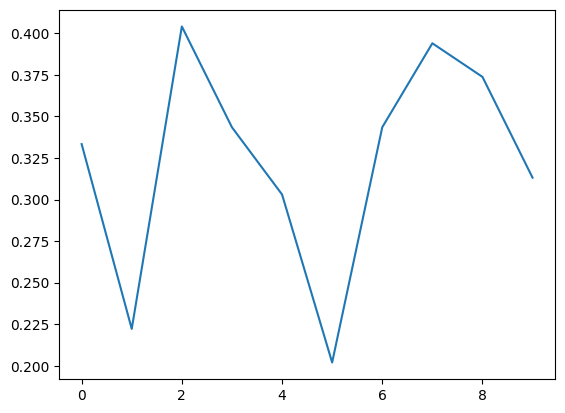

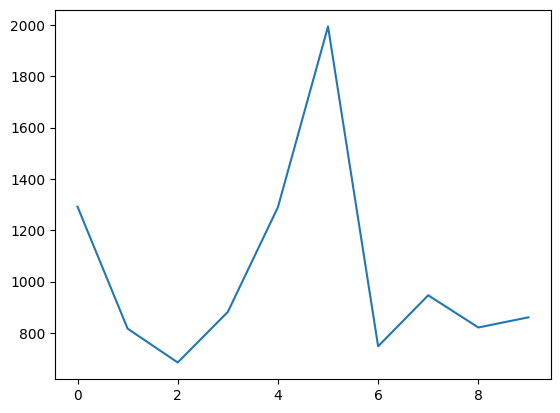

In [67]:
plt.plot(history_4.history["val_accuracy"], label='accuracy')
plt.show()
plt.plot(history_4.history["val_loss"], label='accuracy')

In [68]:
test_loss_4, test_accuracy_4 = model_4.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.2206 - loss: 1317.9576    


In [69]:
history_aug_4 = model_4.fit(train_ds_aug, epochs=10, validation_data=val_ds_aug)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.2203 - loss: 19.9217 - val_accuracy: 0.4949 - val_loss: 8.5701
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.3968 - loss: 9.4612 - val_accuracy: 0.5253 - val_loss: 6.8001
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.4899 - loss: 7.4650 - val_accuracy: 0.6162 - val_loss: 5.9302
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.5399 - loss: 6.4943 - val_accuracy: 0.5960 - val_loss: 5.2693
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.5670 - loss: 5.7675 - val_accuracy: 0.6667 - val_loss: 4.7722
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.5983 - loss: 5.0337 - val_accuracy: 0.6465 - val_loss: 4.0640
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.6076 - loss: 4.5806 - val_accuracy: 0.6869 - val_loss: 3.9235
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.5996 - loss: 4.6042 - val_accuracy: 0.6970 - 

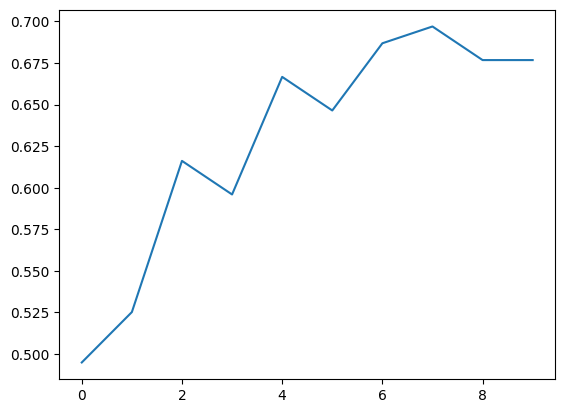

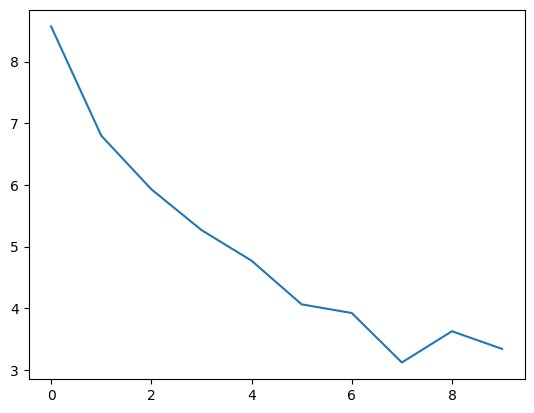

In [70]:
plt.plot(history_aug_4.history["val_accuracy"], label='accuracy')
plt.show()
plt.plot(history_aug_4.history["val_loss"], label='accuracy')

In [71]:
test_loss_aug_4, test_accuracy_aug_4 = model_4.evaluate(test_ds_aug)

11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5646 - loss: 4.4264


## Model pre-trained weights and more complex architecture

In [72]:
inputs = keras.Input(shape=(200, 200, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
dense1 = keras.layers.Dense(128, activation='relu')(vectors)
dropout = keras.layers.Dropout(0.5)(dense1)
outputs = keras.layers.Dense(5, activation="softmax")(dropout)

In [73]:
model_5 = keras.Model(inputs, outputs)

In [74]:
model_5.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,124,397 (80.58 MB)

 Trainable params: 262,917 (1.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [75]:
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.8)
loss = keras.losses.CategoricalCrossentropy()

In [76]:
model_5.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
history_5 = model_5.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.2208 - loss: 297.2038 - val_accuracy: 0.2424 - val_loss: 1.5706
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.2443 - loss: 1.5717 - val_accuracy: 0.2626 - val_loss: 1.5679
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.2513 - loss: 1.5704 - val_accuracy: 0.2626 - val_loss: 1.5677
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.2540 - loss: 1.5690 - val_accuracy: 0.2626 - val_loss: 1.5678
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.2436 - loss: 1.5742 - val_accuracy: 0.2626 - val_loss: 1.5678
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.2541 - loss: 1.5689 - val_accuracy: 0.2626 - val_loss: 1.5678
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.2576 - loss: 1.5671 - val_accuracy: 0.2626 - val_loss: 1.5678
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.2572 - loss: 1.5659 - val_accuracy: 0.2626 -

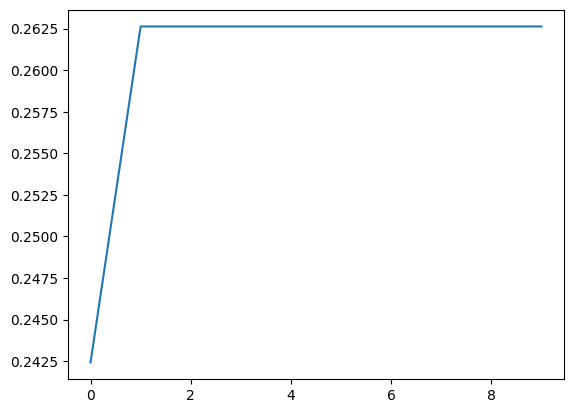

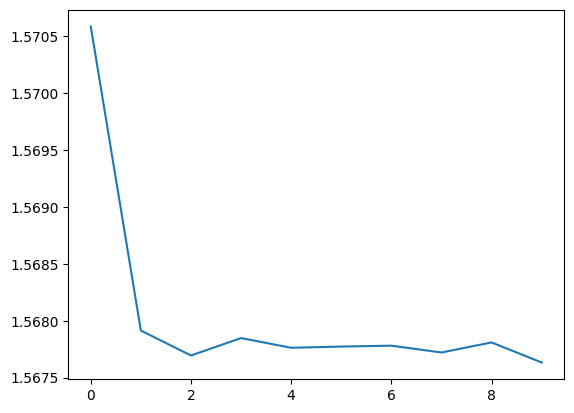

In [77]:
plt.plot(history_5.history["val_accuracy"], label='accuracy')
plt.show()
plt.plot(history_5.history["val_loss"], label='accuracy')

In [78]:
test_loss_5, test_accuracy_5 = model_5.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.1839 - loss: 1.5104    


In [79]:
history_aug_5 = model_5.fit(train_ds_aug, epochs=10, validation_data=val_ds_aug)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.3117 - loss: 1.5111 - val_accuracy: 0.5556 - val_loss: 1.0883
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.4896 - loss: 1.2467 - val_accuracy: 0.6768 - val_loss: 0.8363
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.5593 - loss: 1.0790 - val_accuracy: 0.7273 - val_loss: 0.6891
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.6556 - loss: 0.8645 - val_accuracy: 0.7879 - val_loss: 0.6832
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.6703 - loss: 0.8646 - val_accuracy: 0.7172 - val_loss: 0.7515
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.6504 - loss: 0.8810 - val_accuracy: 0.7576 - val_loss: 0.6377
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.6612 - loss: 0.8229 - val_accuracy: 0.8384 - val_loss: 0.5302
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.6991 - loss: 0.7720 - val_accuracy: 0.7677 - v

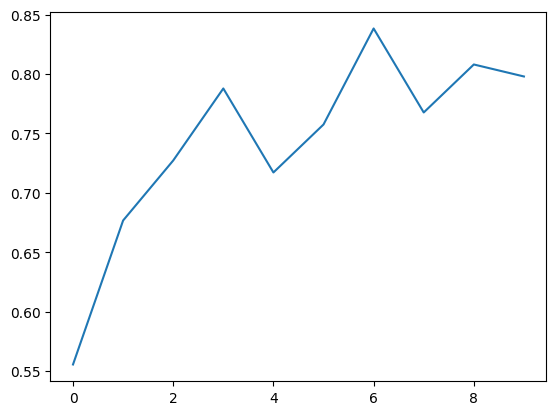

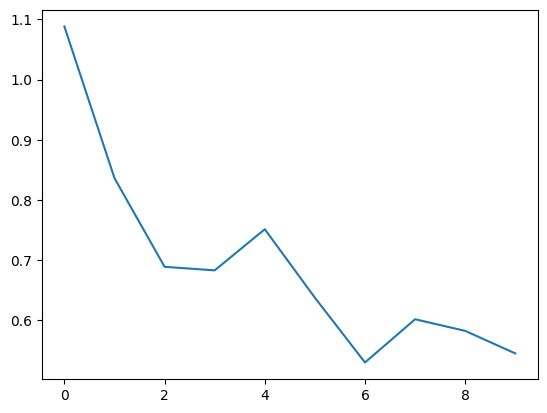

In [80]:
plt.plot(history_aug_5.history["val_accuracy"], label='accuracy')
plt.show()
plt.plot(history_aug_5.history["val_loss"], label='accuracy')

In [81]:
test_loss_aug_5, test_accuracy_aug_5 = model_5.evaluate(test_ds_aug)

11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6679 - loss: 0.7555


## Using ResNet101 as a base model

In [82]:
from keras.applications.resnet import ResNet101

In [83]:
base_model_2 = ResNet101(
    include_top=False,
    input_shape=(200, 200, 3)
)

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


In [84]:
base_model_2.trainable = False

In [86]:
inputs = keras.Input(shape=(200, 200, 3))
base = base_model_2(inputs, training=False)
vectors = layers.GlobalAveragePooling2D()(base)
outputs = layers.Dense(5, activation="softmax")(vectors)

In [88]:
model_6 = keras.Model(inputs, outputs)
model_6.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet101 (Functional)               │ (None, 7, 7, 2048)          │      42,658,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │          10,245 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,668,421 (162.77 MB)

 Trainable params: 10,245 (40.02 KB)

 Non-trainable params: 42,658,176 (162.73 MB)

In [89]:
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.8)
loss = keras.losses.CategoricalCrossentropy()

In [91]:
model_6.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
history_6 = model_6.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 85s 924ms/step - accuracy: 0.5034 - loss: 3.6377 - val_accuracy: 0.7273 - val_loss: 2.2484
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 73s 854ms/step - accuracy: 0.7846 - loss: 1.4977 - val_accuracy: 0.6869 - val_loss: 1.6345
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 72s 851ms/step - accuracy: 0.8463 - loss: 0.7182 - val_accuracy: 0.7374 - val_loss: 1.3253
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 72s 849ms/step - accuracy: 0.8416 - loss: 0.6830 - val_accuracy: 0.7475 - val_loss: 1.6286
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 78s 914ms/step - accuracy: 0.8821 - loss: 0.6256 - val_accuracy: 0.8081 - val_loss: 1.0537
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 82s 964ms/step - accuracy: 0.9082 - loss: 0.3707 - val_accuracy: 0.7980 - val_loss: 1.7023
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 81s 956ms/step - accuracy: 0.9114 - loss: 0.4032 - val_accuracy: 0.7677 - val_loss: 1.5487
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 81s 946ms/step - accuracy: 0.9105 - loss: 0.3887 - val_accu

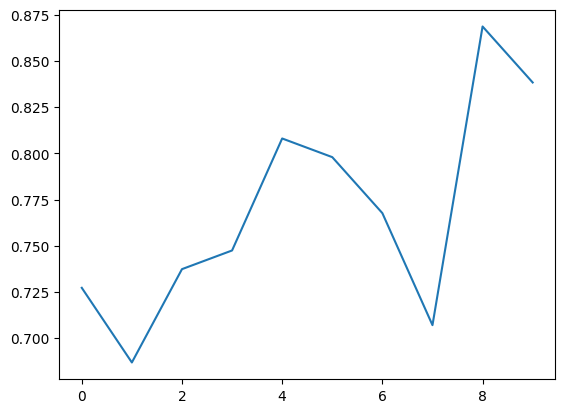

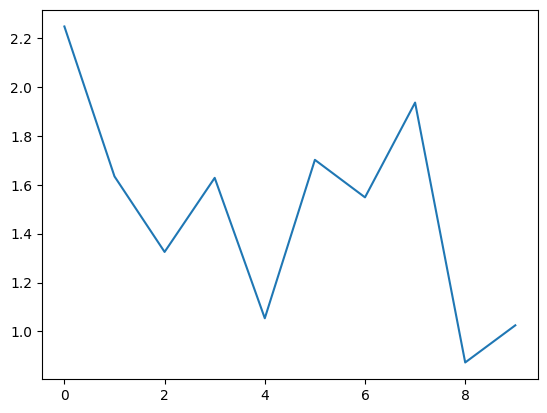

In [92]:
plt.plot(history_6.history['val_accuracy'], label='accuracy')
plt.show()
plt.plot(history_6.history['val_loss'], label='accuracy')

In [93]:
test_loss_6, test_accuracy_6 = model_6.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 874ms/step - accuracy: 0.8557 - loss: 0.8949


In [94]:
history_aug_6 = model_6.fit(train_ds_aug, epochs=10, validation_data=val_ds_aug)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 82s 965ms/step - accuracy: 0.2325 - loss: 4.3714 - val_accuracy: 0.2626 - val_loss: 5.7028
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 975ms/step - accuracy: 0.2276 - loss: 4.5189 - val_accuracy: 0.1717 - val_loss: 3.0579
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 84s 984ms/step - accuracy: 0.2508 - loss: 4.1154 - val_accuracy: 0.1919 - val_loss: 3.3835
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 78s 915ms/step - accuracy: 0.2436 - loss: 3.7675 - val_accuracy: 0.3535 - val_loss: 1.6068
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 78s 917ms/step - accuracy: 0.2685 - loss: 3.1949 - val_accuracy: 0.2828 - val_loss: 2.7185
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 80s 940ms/step - accuracy: 0.2397 - loss: 3.7936 - val_accuracy: 0.2727 - val_loss: 3.4513
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 81s 956ms/step - accuracy: 0.2429 - loss: 3.8066 - val_accuracy: 0.1818 - val_loss: 2.8352
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 970ms/step - accuracy: 0.2850 - loss: 2.9408 - val_accu

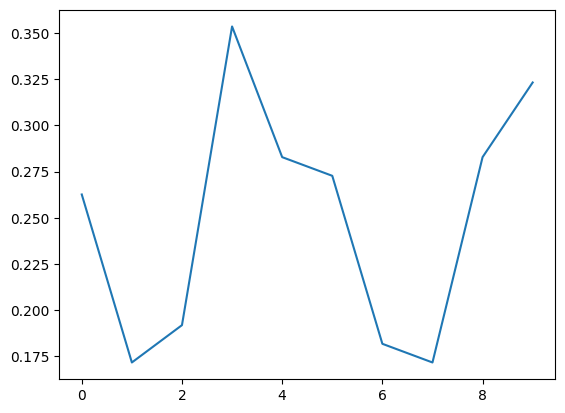

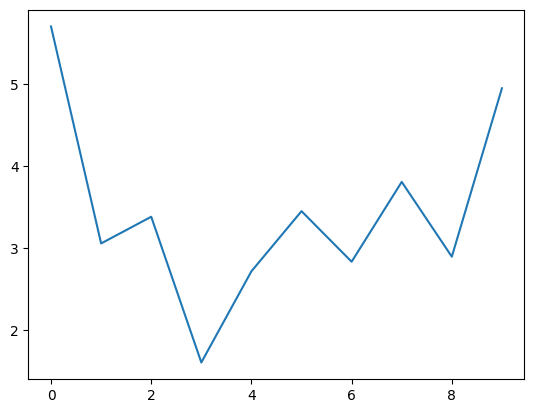

In [95]:
plt.plot(history_aug_6.history['val_accuracy'], label='accuracy')
plt.show()
plt.plot(history_aug_6.history['val_loss'], label='accuracy')

In [96]:
test_loss_aug_6, test_accuracy_aug_6 = model_6.evaluate(test_ds_aug)

11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 812ms/step - accuracy: 0.1805 - loss: 6.6789     


In [97]:
loss_6, accuracy_6 = model_6.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 856ms/step - accuracy: 0.7747 - loss: 2.0445


## Model pre-trained ResNet101 and more complex architecture

In [98]:
inputs = keras.Input(shape=(200, 200, 3))
base = base_model_2(inputs, training=False)
vectors = layers.GlobalAveragePooling2D()(base)
dense1 = layers.Dense(128, activation='relu')(vectors)
dropout = layers.Dropout(0.5)(dense1)
outputs = layers.Dense(5, activation='softmax')(dropout)

In [100]:
model_7 = keras.Model(inputs, outputs)
model_7.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet101 (Functional)               │ (None, 7, 7, 2048)          │      42,658,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,921,093 (163.73 MB)

 Trainable params: 262,917 (1.00 MB)

 Non-trainable params: 42,658,176 (162.73 MB)

In [101]:
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.8)
loss = keras.losses.CategoricalCrossentropy()

In [102]:
model_7.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
history_7 = model_7.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 91s 986ms/step - accuracy: 0.3597 - loss: 2.1840 - val_accuracy: 0.5960 - val_loss: 1.2691
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 84s 987ms/step - accuracy: 0.4451 - loss: 1.3534 - val_accuracy: 0.6162 - val_loss: 1.0325
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 77s 902ms/step - accuracy: 0.5220 - loss: 1.1587 - val_accuracy: 0.5960 - val_loss: 1.1130
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 79s 926ms/step - accuracy: 0.4956 - loss: 1.2297 - val_accuracy: 0.6869 - val_loss: 0.8233
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 81s 956ms/step - accuracy: 0.5629 - loss: 1.1349 - val_accuracy: 0.6566 - val_loss: 0.9275
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 80s 944ms/step - accuracy: 0.5419 - loss: 1.1876 - val_accuracy: 0.7374 - val_loss: 0.7538
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 75s 886ms/step - accuracy: 0.5741 - loss: 1.0412 - val_accuracy: 0.7576 - val_loss: 0.5895
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 77s 910ms/step - accuracy: 0.5903 - loss: 1.0391 - val_accu

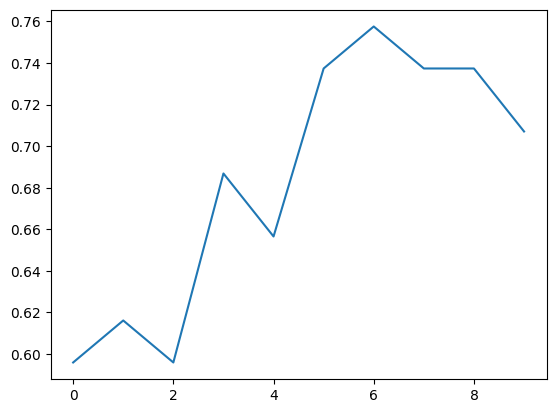

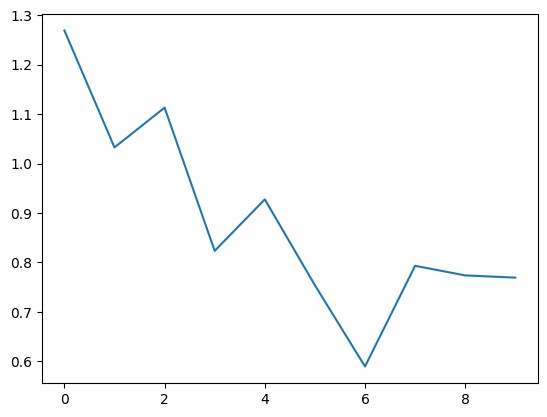

In [103]:
plt.plot(history_7.history["val_accuracy"], label='accuracy')
plt.show()
plt.plot(history_7.history["val_loss"], label='accuracy')

In [104]:
test_loss_7, test_accuracy_7 = model_7.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 844ms/step - accuracy: 0.6806 - loss: 0.8950


In [105]:
history_aug_7 = model_7.fit(train_ds_aug, epochs=10, validation_data=val_ds_aug)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 78s 914ms/step - accuracy: 0.2506 - loss: 1.6337 - val_accuracy: 0.2626 - val_loss: 1.5707
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 73s 863ms/step - accuracy: 0.2486 - loss: 1.5790 - val_accuracy: 0.2626 - val_loss: 1.5678
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 74s 863ms/step - accuracy: 0.2446 - loss: 1.5715 - val_accuracy: 0.2626 - val_loss: 1.5677
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 74s 873ms/step - accuracy: 0.2646 - loss: 1.5756 - val_accuracy: 0.2626 - val_loss: 1.5677
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 75s 882ms/step - accuracy: 0.2558 - loss: 1.5743 - val_accuracy: 0.2626 - val_loss: 1.5681
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 74s 873ms/step - accuracy: 0.2730 - loss: 1.5575 - val_accuracy: 0.2626 - val_loss: 1.5680
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 979ms/step - accuracy: 0.2710 - loss: 1.5676 - val_accuracy: 0.2626 - val_loss: 1.5681
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 980ms/step - accuracy: 0.2395 - loss: 1.5700 - val_accu

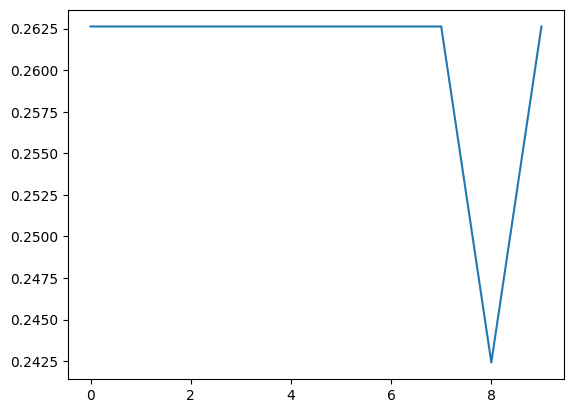

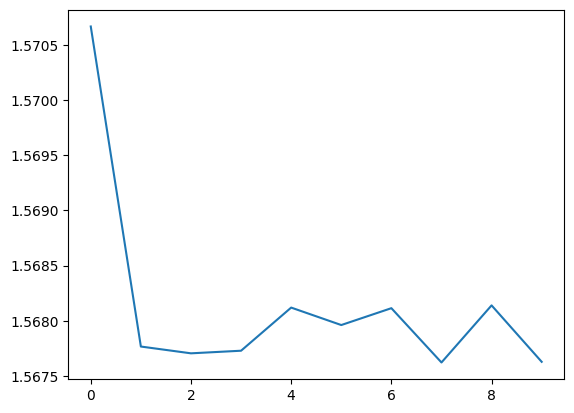

In [106]:
plt.plot(history_aug_7.history["val_accuracy"], label='accuracy')
plt.show()
plt.plot(history_aug_7.history["val_loss"], label='accuracy')

In [107]:
test_loss_aug_7, test_accuracy_aug_7 = model_7.evaluate(test_ds_aug)

11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 882ms/step - accuracy: 0.1839 - loss: 1.5064   


In [108]:
loss_7, accuracy_7 = model_7.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 900ms/step - accuracy: 0.6434 - loss: 0.8643


In [112]:
models_accuracy = {
    'model_1': test_accuracy_aug_1,
    'model_2': test_accuracy_aug_2,
    'model_3': test_accuracy_aug_3,
    'model_4': test_accuracy_aug_4,
    'model_5': test_accuracy_aug_5,
    'model_6': accuracy_6,
    'model_7': accuracy_7
}

In [113]:
sorted_accuracy = sorted(models_accuracy.items(), key=lambda x:x[1])

In [114]:
sorted_accuracy

[('model_1', 0.24378108978271484),
 ('model_2', 0.24378108978271484),
 ('model_3', 0.323383092880249),
 ('model_4', 0.5522388219833374),
 ('model_5', 0.6716417670249939),
 ('model_7', 0.6865671873092651),
 ('model_6', 0.7562189102172852)]